In [2]:
HEIGHT = 128
WIDTH = 128
EPOCHS = 8
BATCH_SIZE = 16
TRAIN_CSV = "D:/kitti_dataset/train/kitti_train.csv"

In [3]:
import numpy as np
import tensorflow as tf
from segmentation_models import Unet

%run utils/datasets.ipynb

%run utils/utils.ipynb

Segmentation Models: using `keras` framework.


In [4]:
partition, labels = load_train_csv(TRAIN_CSV)

In [5]:
# partition['train'] = partition['train'][:20000]
# partition['validation'] = partition['validation'][:5000]

In [6]:
print(len(partition['train']), len(partition['validation']))

4539 1135


In [7]:
training_generator = DataGenerator(list_IDs=partition['train'], labels=labels, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator = DataGenerator(list_IDs=partition['validation'], labels=labels, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [8]:
model = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [9]:
# model.summary()

In [10]:
model.compile(optimizer=opt,
              loss=lambda y_true, y_pred : gen_depth_loss(y_true, y_pred, (1.0, 3.0, 0.1)),
              metrics=[depth_acc])

In [11]:
r = model.fit(training_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/8
283/283 [==============================] - 239s 804ms/step - loss: 0.2520 - depth_acc: 0.8983 - val_loss: 0.2229 - val_depth_acc: 0.8316
Epoch 2/8
283/283 [==============================] - 53s 186ms/step - loss: 0.1371 - depth_acc: 0.9463 - val_loss: 0.1823 - val_depth_acc: 0.8148
Epoch 3/8
283/283 [==============================] - 51s 178ms/step - loss: 0.1296 - depth_acc: 0.9544 - val_loss: 0.1363 - val_depth_acc: 0.9294
Epoch 4/8
283/283 [==============================] - 51s 180ms/step - loss: 0.1250 - depth_acc: 0.9594 - val_loss: 0.1239 - val_depth_acc: 0.9599
Epoch 5/8
283/283 [==============================] - 52s 182ms/step - loss: 0.1217 - depth_acc: 0.9627 - val_loss: 0.1198 - val_depth_acc: 0.9639
Epoch 6/8
283/283 [==============================] - 53s 188ms/step - loss: 0.1188 - depth_acc: 0.9659 - val_loss: 0.1173 - val_depth_acc: 0.9666
Epoch 7/8
283/283 [==============================] - 51s 180ms/step - loss: 0.1163 - depth_acc: 0.9685 - val_loss: 0.1158 -

In [12]:
print(r.history)

{'loss': [0.2519926428794861, 0.1370539516210556, 0.12959975004196167, 0.12504824995994568, 0.12174130231142044, 0.11880454421043396, 0.1162961795926094, 0.1144053041934967], 'depth_acc': [0.8983240127563477, 0.9463152885437012, 0.9543931484222412, 0.9593793749809265, 0.9627403020858765, 0.9659269452095032, 0.9685223698616028, 0.9694343209266663], 'val_loss': [0.22293369472026825, 0.18234403431415558, 0.13628697395324707, 0.12390381842851639, 0.11979089677333832, 0.11734326183795929, 0.11582958698272705, 0.11407630145549774], 'val_depth_acc': [0.831636905670166, 0.8147809505462646, 0.9294130802154541, 0.9598809480667114, 0.9638532400131226, 0.9665511846542358, 0.9692345857620239, 0.9707146883010864]}


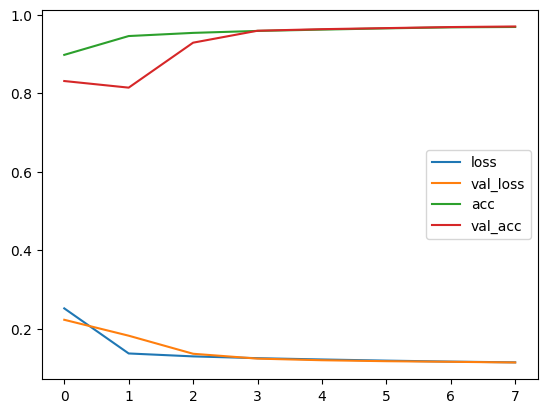

In [13]:
plot_history(r.history)

In [14]:
print(save_model('kitti_resnet', model))

model_kitti_resnet_1716910504.keras
